<a href="https://colab.research.google.com/github/Muhammad-javed440/04-ai-suit/blob/master/deep_learning_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [3]:
# Load data set of fashion mnist
fmnist = tf.keras.datasets.fashion_mnist

In [4]:
print(fmnist)

<module 'keras.api.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/datasets/fashion_mnist/__init__.py'>


In [5]:
# Load the training and test split of the fation mnist data sets
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Label: 6

Image: [[  0   0   0   0   0   0   0   0   0   0  19 164  99  92  86 132 132   7   0   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   2   0   0  11  64 159 156 159 129  55 116 125  37   0   0   0   1   0   1   0   0   0]
 [  0   0   0   0   0   0   0   1  79 123   8 119 155 119 147 177 107 129 165  92  11   0   0   0   0   0   0   0]
 [  0   0   0   0   2   0  56 116  22 116 104  77 171 244 255 159  82 147  83  79  62 138   4   0   4   0   0   0]
 [  0   1   1   1   0  22 140 108  68 104 113 105  61 171 104  65 140 122  90 107 113 114  55   0   0   0   0   0]
 [  0   2   1   2   0  83  95 108 117 104  92 122 111 117 131  80 152  87 108  86 120 134  95   0   0   0   0   0]
 [  0   0   0   0   2 101  19 110 114 114  96 104 113  89 120 108  85  96 101  95  90 156 111  23   0   1   0   0]
 [  0   1   0   0  25 123 126 138 113  41  96 111 101  83 147 101  86 104 110  32  41 159 113  83   0   0   0   0]
 [  0   0   1   0  77  98 152 143  46  23 119 105 105  95 117  

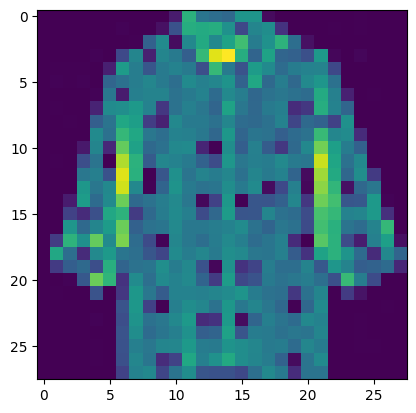

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# you can put between 0 to 59999
index = 560
# Set number of characterw per now when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'Label: {training_labels[index]}')
print(f'\nImage: {training_images[index]}')

# Plot the image
plt.imshow(training_images[index])

In [7]:
# Normalize the pixel values of the train  and test images (0-1) ranged
training_images = training_images / 255.0
test_images = test_images / 255.0

In [8]:
# Build the classifcation model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [9]:
# Declare sample  inputs and convert to tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [10]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7835 - loss: 0.6242
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8624 - loss: 0.3814
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8770 - loss: 0.3407
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8845 - loss: 0.3148
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8927 - loss: 0.2882


In [11]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8720 - loss: 0.3527


[0.35519781708717346, 0.8712000250816345]